# The 21cm background with 21cmFAST

In this tutorial we will learn how to simulate the 21cm background with a popular semi-numerical code. We are going to: 

1) Derive co-eval signal cubes

2) Derive lightcones of 21cm data

3) Analyse: 21cm power spectrum

This tutorial follows part of the tutorials here: https://github.com/21cmfast/21cmFAST/tree/master/docs/tutorials
As well as descriptions here: https://21cmfast.readthedocs.io/en/latest/tutorials

### Code repository
More information on the semi-numerical code 21cmFAST can be found here:

https://github.com/21cmfast/21cmFAST

https://21cmfast.readthedocs.io

### Publications
21cmFAST was introduced here: https://arxiv.org/pdf/1003.3878.pdf

as well as its python-wrapped version: https://doi.org/10.21105/joss.02582 

In [ ]:
# some packages that we will need
#uncomment on google colab:
#!pip install -q condacolab
#import condacolab
#condacolab.install()
#!conda --version
#!conda install -c conda-forge 21cmFAST

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
# We change the default level of the logger so that
# we can see what's happening with caching.
import logging, sys, os
logger = logging.getLogger('21cmFAST')
logger.setLevel(logging.INFO)

import py21cmfast as p21c

# For plotting the cubes, we use the plotting submodule:
from py21cmfast import plotting

# For interacting with the cache
from py21cmfast import cache_tools

print(f"Using 21cmFAST version {p21c.__version__}")

Using 21cmFAST version 3.0.3


In [10]:
# Clear the cache
if not os.path.exists('_cache'):
    os.mkdir('_cache')

p21c.config['direc'] = '_cache'
cache_tools.clear_cache(direc="_cache")

2023-04-10 22:55:20,905 | INFO | Removed 0 files from cache.


## 1) Derive co-eval signal cubes

Co-eval cubes are boxes taken at at fixed time, or redshift. The run_coeval method performs all necessary simulation steps to derive the 21cm co-eval box. 

In [11]:
# call run_coeval at three different redshifts
coeval8, coeval9, coeval10 = p21c.run_coeval(
    redshift = [8.0, 9.0, 10.0],
    user_params = {"HII_DIM": 100, "BOX_LEN": 100, "USE_INTERPOLATION_TABLES": True},
    cosmo_params = p21c.CosmoParams(SIGMA_8=0.8),
    astro_params = p21c.AstroParams({"HII_EFF_FACTOR":20.0}),
    random_seed=12345
)


2023-04-10 22:55:41,025 | ERROR | In function: ComputeIonizedBox.  Arguments: (10.0, 0, UserParams(BOX_LEN:100, DIM:300, HII_DIM:100, HMF:1, NO_RNG:False, N_THREADS:1, PERTURB_ON_HIGH_RES:False, POWER_SPECTRUM:0, USE_FFTW_WISDOM:False, USE_INTERPOLATION_TABLES:True, USE_RELATIVE_VELOCITIES:False), CosmoParams(OMb:0.04897468161869667, OMm:0.30964144154550644, POWER_INDEX:0.9665, SIGMA_8:0.8, hlittle:0.6766), AstroParams(ALPHA_ESC:-0.5, ALPHA_STAR:0.5, F_ESC10:0.1, F_ESC7_MINI:0.01, F_H2_SHIELD:0.0, F_STAR10:0.05011872336272722, F_STAR7_MINI:0.01, HII_EFF_FACTOR:20.0, ION_Tvir_MIN:49999.9995007974, L_X:1e+40, L_X_MINI:1e+40, M_TURN:501187233.6272715, NU_X_THRESH:500.0, N_RSD_STEPS:20, R_BUBBLE_MAX:15.0, X_RAY_SPEC_INDEX:1.0, X_RAY_Tvir_MIN:49999.9995007974, t_STAR:0.5), FlagOptions(INHOMO_RECO:False, M_MIN_in_Mass:False, PHOTON_CONS:False, SUBCELL_RSD:False, USE_HALO_FIELD:False, USE_MASS_DEPENDENT_ZETA:False, USE_MINI_HALOS:False, USE_TS_FLUCT:False), PerturbedField(UserParams(BOX_LEN:1

FatalCError: 21cmFAST is exiting.

We now have a look at the set of parameters we can access.

### Task 1: 
Explore user_params, cosmo_params, astro_params:

Create some more co-eval cubes in different settings.


In [8]:
print(coeval8.user_params)

NameError: name 'coeval8' is not defined

Let's now have a look at the cubes!

###  Question: 
What dimensions do the co-eval cubes created have?

### Task 2:
Plot some co-eval cubes.

In [8]:
# base example
print(coeval8.brightness_temp.shape)

fig, ax = plt.subplots(1,3, figsize=(14,4))
for i, (coeval, redshift) in enumerate(zip([coeval8, coeval9, coeval10], [8,9,10])):
    plotting.coeval_sliceplot(coeval, ax=ax[i], fig=fig);
    plt.title("z = %s"%redshift)
plt.tight_layout()

# _struct attributes contain the numpy arrays of the data cubes, more functions are available
coeval8.brightness_temp_struct.global_Tb

NameError: name 'coeval8' is not defined

## 2a) Compare saliency maps for different inputs

### Task 2a: 
Plot both saliency for simulations-only and mock lightcones

### Question 2a: 
Does the network's attention shift with the inclusion of noise? If yes, how?

(1, 140, 140, 2350)


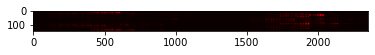

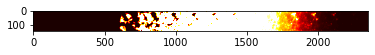

In [5]:
# Task 2, plot and compare here
model2 = keras.models.load_model('models/3D_21cmPIE_Net_optmock_par6.h5')
#google colab: one might have to adjust the path e.g. to 'introspection-tutorial/models/..

obj_saliency2 = Saliency(model2, model_modifier=model_modifier,clone=True) 

# generate saliency maps for parameters i.e. classes
parameters=[0,1,2,3,4,5]
lc = data[0,0]
for para in parameters:
    def loss(output):
        return output[0][para] # shape (samples,classes)
    map_saliency2 = obj_saliency2(loss,lc.reshape(140,140,2350,1))

print(map_saliency2.shape)
nslice = 130
plt.figure()
plot_saliency = plt.imshow(map_saliency2[0,nslice,:,:], cmap=cm.hot)
plt.figure()
plot_lc = plt.imshow(lc[nslice,:,:], cmap="EoR",vmin=-150,vmax=30)

## 2b) Beyond vanilla saliency 
### Question 2b: 
Can the mapping of attention with saliency be improved, in particular can noise in the maps be reduced? Tipp: Use SmoothGrad from tf-keras-vis. What does SmoothGrad exploit?

### Task 2b:
Explore SmoothGrad for different setting (smooth_samples, smooth_noise).

(1, 140, 140, 2350)


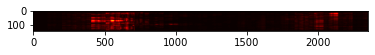

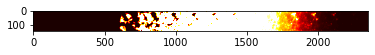

In [6]:
#  Question 2b, try out SmoothGrad here
from tf_keras_vis.saliency import Saliency

# Change the sigmoid activation of the last layer to a linear one to not obstruct attention.
def model_modifier(m):
    m.layers[-1].activation = tf.keras.activations.linear
    return m

# create saliency object
obj_saliency = Saliency(model, model_modifier=model_modifier,clone=True) 

nsamples = 5
noise = 0.2

# generate saliency maps for parameters i.e. classes
parameters=[0,1,2,3,4,5]
lc = data[0,0]
for para in parameters:
    def loss(output):
        return output[0][para] # shape (samples,classes)
    map_saliency = obj_saliency(loss,lc.reshape(140,140,2350,1),smooth_samples=nsamples,smooth_noise=noise)

print(map_saliency.shape)
nslice = 130
plt.figure()
plot_saliency = plt.imshow(map_saliency[0,nslice,:,:], cmap=cm.hot)
plt.figure()
plot_lc = plt.imshow(lc[nslice,:,:], cmap="EoR",vmin=-150,vmax=30)

## 3) (optional) Derive class activation maps and compare 

### Task 3: 
Create CAMs, explore their spatial and temporal structure. 

In [ ]:
# note: 
# there is currently an incompatibility of CAM generated with tf-keras-vis and the tensorflow version 2.9
# will need to downgrade tensorflow version
from tf_keras_vis.gradcam import Gradcam

# create CAM object
obj_cam = gradcam.Gradcam(model, model_modifier=model_modifier,clone=True) 

# generate heatmaps for attention
parameters=[0,1,2,3,4,5]
lc = data[0,0]
for para in parameters:
    def loss(output):
        return output[0][para] # shape (samples,classes)
    map_cam = obj_cam(loss,lc.reshape(140,140,2350,1),penultimate_layer=-1) # focus on last convolutional layer

print(map_cam.shape)
nslice = 130
plt.figure()
plot_cam = plt.imshow(map_cam[0,nslice,:,:], cmap=cm.hot)
plt.figure()
plot_lc = plt.imshow(lc[nslice,:,:], cmap="EoR",vmin=-150,vmax=30)